# Jupyter gfort kernel 

## switching compilers
- %compiler: [*gofrtran/gcc/g++*] [**.** *file extention*]  
  
Default compiler is gfortran. 

## free format source

In [1]:
program compiler
    use, intrinsic :: iso_fortran_env  ! F08
    implicit none
    print *, compiler_version()
    print *, compiler_options()
end program compiler 

 GCC version 7.3.0
 -mtune=generic -march=x86-64


## fixed format source
- %compiler: gfortran .f

In [2]:
%compiler: gfortran .f
C FIXED FORMAT SOURCE
C23456789012345678901234567890
      PROGRAM FXDFMT
      PARAMETER (N = 10)
      ISUM = 0
      PRINT *, '          I         I**2     SUM(2*I-1)'
      PRINT *, '       --------------------------------'
      DO 10 I = 1, N
         IODD = 2 * I - 1
         ISUM = ISUM + IODD
         PRINT *, I, I**2, ISUM
10    CONTINUE
      PRINT *, '       --------------------------------'
      STOP 'NORMAL END'
      END 

           I         I**2     SUM(2*I-1)
        --------------------------------
           1           1           1
           2           4           4
           3           9           9
           4          16          16
           5          25          25
           6          36          36
           7          49          49
           8          64          64
           9          81          81
          10         100         100
        --------------------------------


STOP NORMAL END


## compiler options
- %fcflags: *arg1 arg2* ....
- %ldflags: *arg1 arg2* ....

gfortran **%fcflags**  source.f90  **%ldglags**

In [3]:
%fcflags: -O2
program optimization_2
    implicit none
    real, parameter :: pi = 4.0 * atan(1.0)
    real :: zeta4
    integer :: i
    zeta4 = 0.0
    do i = 1, 10**2
        zeta4 = zeta4 + 1.0 / real(i**4) 
    end do
    print *, 'Sum_1..100 1/x^4 =', zeta4
    print *, 'pi^4/90          =', pi**4 / 90.0 
    stop 'normal end'
end program optimization_2

 Sum_1..100 1/x^4 =   1.08232212    
 pi^4/90          =   1.08232331    


STOP normal end



$
\zeta(4)=\sum_{k\, =1}^\infty{1\over k^4}={\pi^4\over90}
$

## separate module compilation
%module: *objectname*

In [4]:
%module: mod
%fcflags: -O2
module m_sort
    implicit none
contains
    recursive function qsort(x) result(res)
        real, intent(in) :: x(:)
        real             :: res(size(x))
        if (size(x) == 0) return
        res = [qsort( pack(x(2:), x(2:) <= x(1)) ), x(1), &
               qsort( pack(x(2:), x(2:) >  x(1)) ) ]
    end function qsort
end module m_sort

[gfort kernel] module objects created successfully: mod.o

In [5]:
%fcflags: mod.o -O2
program quicksort
    use m_sort
    implicit none
    integer, parameter :: n = 50
    real :: x(n)
    call random_seed()
    call random_number(x)
    print '(10f7.4)', x
    print *
    print '(10f7.4)', qsort(x)
end program quicksort

 0.1155 0.4123 0.3952 0.4622 0.0031 0.9343 0.9895 0.9599 0.4829 0.0218
 0.1987 0.1876 0.2523 0.5254 0.8738 0.6752 0.7441 0.2684 0.9451 0.3154
 0.1766 0.7046 0.8786 0.5281 0.1586 0.3020 0.2923 0.3206 0.4691 0.5830
 0.6207 0.3350 0.5098 0.0185 0.6186 0.5890 0.1705 0.0636 0.8819 0.5734
 0.1903 0.6538 0.2218 0.3860 0.8843 0.8884 0.9591 0.2452 0.1971 0.1696

 0.0031 0.0185 0.0218 0.0636 0.1155 0.1586 0.1696 0.1705 0.1766 0.1876
 0.1903 0.1971 0.1987 0.2218 0.2452 0.2523 0.2684 0.2923 0.3020 0.3154
 0.3206 0.3350 0.3860 0.3952 0.4123 0.4622 0.4691 0.4829 0.5098 0.5254
 0.5281 0.5734 0.5830 0.5890 0.6186 0.6207 0.6538 0.6752 0.7046 0.7441
 0.8738 0.8786 0.8819 0.8843 0.8884 0.9343 0.9451 0.9591 0.9599 0.9895


## c compiler
- %compiler: gcc .c

In [6]:
%compiler: gcc .c
#include <stdio.h>
int main(void) {
   printf("Hello, World!\n");
   return 0;
}

Hello, World!


## c++ compiler
- %compiler: g++ .c++

In [8]:
%compiler: g++ .c++
#include <iostream>

using namespace std;

int main() {
    std::cout << "Hello World!" << std::endl;
    return 0;
}

Hello World!


## Matplotlib ready
- %fig: *arg*

    _fig = plt.figure( *arg* )  

In [9]:
program sin_curve
    implicit none
    real   , parameter :: pi = 4.0 * atan(1.0)
    integer, parameter :: n = 100
    real :: x
    integer :: i
    write(9, *) 'x', 'sin(x)'
    do i = 0, n
        x = 2.0 * pi * i / n 
        write(9, *) x, sin(x)
    end do
    stop 'normal end'
end program sin_curve

STOP normal end


```
%fig: arg  
```

```python
import matplotlib.pyplot as plt  
import numpy as np  
_fig = plt.figure( arg )  
```
> Cell inputs are executed by Python3 exec-function line by line.  
> Assigment to _fig is possible. (Multiple assignment _fig, ax = ... is not allowed.)  

```python
plt.plot
```

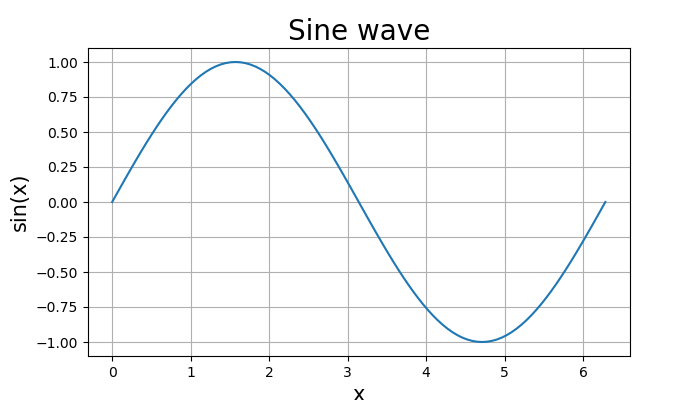

In [10]:
%fig: figsize=(7, 4)
x, y = np.loadtxt('fort.9', unpack = True, skiprows=1)
plt.grid(which='both')
plt.plot(x, y)
plt.title('Sine wave', fontsize = 20)
plt.xlabel('x'       , fontsize = 15)
plt.ylabel('sin(x)'  , fontsize = 15)

## Show images
%image: *fn1* *fn2* ...

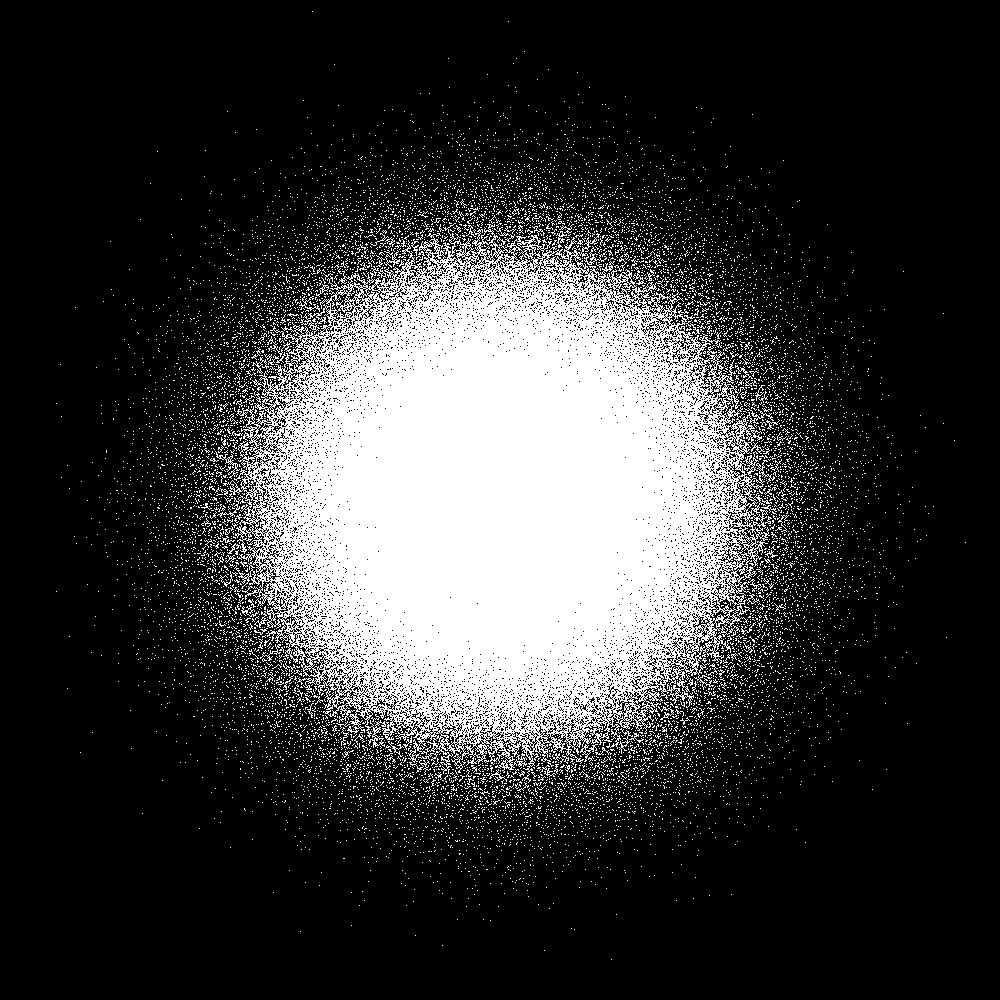

In [1]:
%image:S.png